### Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

### Loading the Malaria Dataset

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split = ['train'])

In [3]:
for i in dataset[0].take(4):
    print(i)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(106, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

### Loading the Malaria Dataset

In [5]:
def splits(dataset,train_ratio, test_ratio, val_ratio):
    DATA_SIZE = len(dataset)

    train_data = dataset.take(int(train_ratio*DATA_SIZE))

    val_test_data = dataset.skip(int(train_ratio*DATA_SIZE))
    val_data = val_test_data.take(int(val_ratio*DATA_SIZE))

    test_data = val_test_data.skip(int(test_ratio*DATA_SIZE))
    
    return train_data, test_data, val_data


In [6]:
train_data, test_data , val_data = splits(dataset[0], 0.8, 0.1, 0.1)

In [7]:
list(train_data.take(1).as_numpy_iterator())

[(array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8),
  1)]

#### Data Visualization

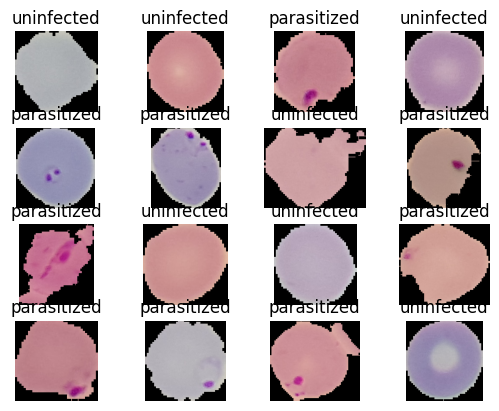

In [8]:
for i, (image, label) in enumerate(train_data.take(16)):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis('off')

#### Data Preprocessing

- Resizing the data into shape(224, 224,3)

In [9]:
IM_SIZE = 224
def resize_rescale(image, label):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [10]:
train_data = train_data.map(resize_rescale)
test_data = test_data.map(resize_rescale)
val_data = val_data.map(resize_rescale)

In [11]:
for image,label in train_data.take(16):
    print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [12]:
BATCH_SIZE = 32
train_data =  train_data.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [13]:
val_data =  val_data.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

#### Model Creation

-  Creating LeNet like architecture.

In [14]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters = 6, kernel_size = 5, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Conv2D(filters = 16, kernel_size = 5, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Flatten(),
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid'),
])
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_1 (Batc  (None, 106, 106, 16)     64        
 hNormalization)                                                 
                                                        

- Compiling the model.

In [15]:
lenet_model.compile(optimizer= Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics='accuracy'
              )

-  Training on train and validation data.

In [16]:
history = lenet_model.fit(train_data, validation_data=val_data, epochs = 5, verbose = 1)

Epoch 1/5


689/689 [==============================] - 71s 88ms/step - loss: 0.4813 - accuracy: 0.7625 - val_loss: 0.3891 - val_accuracy: 0.8730
Epoch 2/5
689/689 [==============================] - 62s 90ms/step - loss: 0.1930 - accuracy: 0.9365 - val_loss: 0.2137 - val_accuracy: 0.9376
Epoch 3/5
689/689 [==============================] - 62s 89ms/step - loss: 0.1634 - accuracy: 0.9473 - val_loss: 0.2462 - val_accuracy: 0.9387
Epoch 4/5
689/689 [==============================] - 61s 89ms/step - loss: 0.1572 - accuracy: 0.9478 - val_loss: 0.4322 - val_accuracy: 0.9227
Epoch 5/5
689/689 [==============================] - 57s 83ms/step - loss: 0.1434 - accuracy: 0.9536 - val_loss: 0.1646 - val_accuracy: 0.9488


In [24]:
history.history

{'loss': [0.48126569390296936,
  0.19302776455879211,
  0.16340547800064087,
  0.15721483528614044,
  0.14337162673473358],
 'accuracy': [0.7624512314796448,
  0.9365417957305908,
  0.9473373889923096,
  0.9478363394737244,
  0.9536423683166504],
 'val_loss': [0.3891226649284363,
  0.21369409561157227,
  0.24618376791477203,
  0.43218836188316345,
  0.1646265983581543],
 'val_accuracy': [0.872958242893219,
  0.9375680685043335,
  0.9386569857597351,
  0.9226860404014587,
  0.9488203525543213]}

- Model Performance

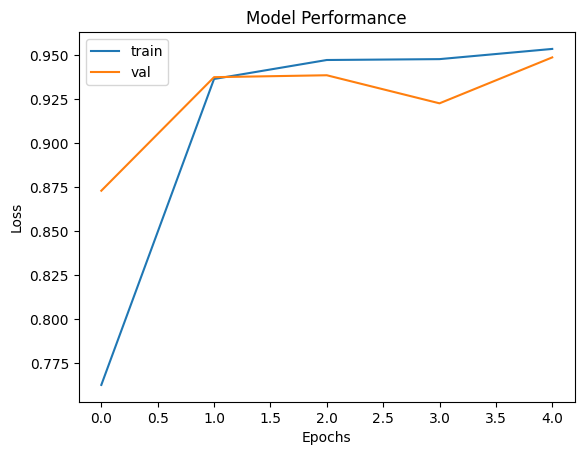

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

### Model Evaluation

In [17]:
test_data = test_data.batch(1)

In [18]:
lenet_model.evaluate(test_data)

2757/2757 [==============================] - 21s 6ms/step - loss: 0.1893 - accuracy: 0.9492


[0.18932977318763733, 0.9492201805114746]

- Predicting on single test data

In [19]:
lenet_model.predict(test_data.take(1))[0][0]

1/1 [==============================] - 4s 4s/step


0.9344173

- Batch Prediction

In [20]:
def parasite_or_not (x):
    if x < 0.5:
        return 'P'
    else:
        return 'U'

1/1 [==============================] - 0s 29ms/step


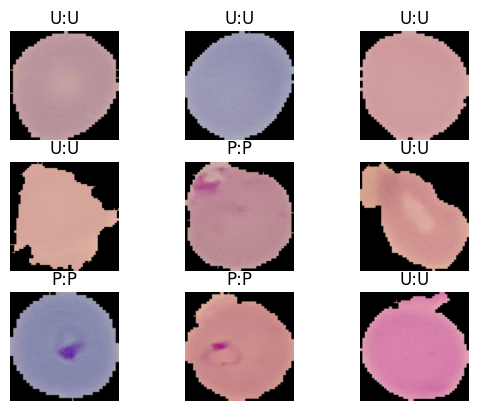

In [21]:
for i, (image, label) in enumerate(test_data.take(9)):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))
    plt.axis('off') 

### Saving the Model and Weights

In [22]:
lenet_model.save('models/Lenet_Model')

INFO:tensorflow:Assets written to: models/Lenet_Model\assets


INFO:tensorflow:Assets written to: models/Lenet_Model\assets


In [27]:
lenet_model.save_weights('weights/lenet_weights')